In [1]:
import warnings
warnings.filterwarnings("ignore")
import librosa 
from scipy.io import wavfile as wav
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
from sklearn.preprocessing import OneHotEncoder

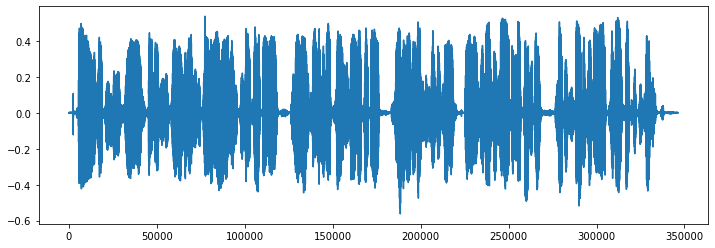

In [2]:
# Class: English
filename = 'lang/en/_e4fgbYJsYM__U__S1---0228.380-0244.080.wav'
librosa_audio, librosa_sample_rate = librosa.load(filename) 
scipy_sample_rate, scipy_audio = wav.read(filename)
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio);

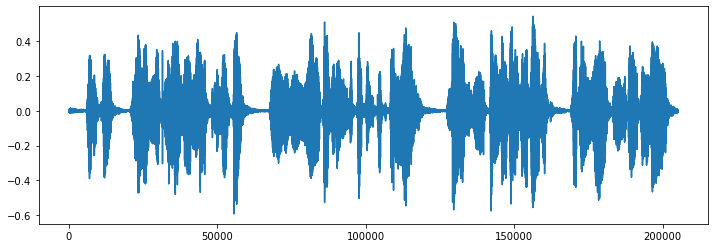

In [3]:
# Class: Arabic
filename = 'lang/ar/_73h_mgRMGU__U__S0---0115.460-0124.760.wav'
librosa_audio, librosa_sample_rate = librosa.load(filename) 
scipy_sample_rate, scipy_audio = wav.read(filename)
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio);

## Get all audio files in Dataframe with its label (The language)

In [4]:
Fname = []
# return all files as a list
for file in os.listdir(r'lang/en/'):
     # check the files which are end with specific extension
    if file.endswith(".wav"):
        # print path name of selected files
        Fname.append(file)

In [5]:
dfEn = pd.DataFrame (Fname, columns = ['name'])
dfEn['class_name'] = 'English'
dfEn.head()

,name,class_name
0,mzfg0RGJnV8__U__S104---1155.180-1163.640.wav,English
1,5Jr_iCUJJpQ__U__S336---2805.850-2824.230.wav,English
2,dwAr2ECXbkE__U__S109---0475.980-0491.120.wav,English
3,eK8S51L8juo__U__S0---0332.860-0346.620.wav,English
4,g-v6UDIsHU4__U__S0---0417.970-0437.630.wav,English


In [6]:
dfEn.shape

(15860, 2)

In [7]:
Fname = []
# return all files as a list
for file in os.listdir(r'lang/ar/'):
     # check the files which are end with specific extension
    if file.endswith(".wav"):
        # print path name of selected files
        Fname.append(file)
dfAr = pd.DataFrame (Fname, columns = ['name'])
dfAr['class_name'] = 'Arabic'
dfAr.head()

,name,class_name
0,aydTM0Rqkbo__U__S11---0202.590-0207.360.wav,Arabic
1,ZTrjAOZCW8I__U__S84---0501.010-0510.070.wav,Arabic
2,BJaDBoqy0Fk__U__S37---0218.440-0222.060.wav,Arabic
3,Co57X8B6Tvs__U__S102---0355.800-0368.650.wav,Arabic
4,C8onkUGqhnU__U__S118---1475.840-1484.770.wav,Arabic


In [8]:
dfAr.shape

(21645, 2)

## Extract Features for every file (Mel-Frequency Cepstral Coefficients (MFCC))

In [9]:
def extract_features(file_name):
    try:
        audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        mfccsscaled = np.mean(mfccs.T,axis=0)
        
    except Exception as e:
        print("Error encountered while parsing file: ", file)
        return None 
     
    return mfccsscaled

In [10]:
fulldatasetpath = 'lang/en/'

metadata = dfEn.head(10) # For now we only got 10 aufios

features = []

# Iterate through each sound file and extract the features 
for index, row in metadata.iterrows():
    file_name = os.path.join(os.path.abspath(fulldatasetpath),str(row["name"]))
    class_label = row["class_name"]
    data = extract_features(file_name)
    features.append([data, class_label])
    
# Convert into a Panda dataframe 
featuresdfEn = pd.DataFrame(features, columns=['feature','class_label'])
print('Finished feature extraction from ', len(featuresdfEn), ' English files') 

Finished feature extraction from  10  English files


In [11]:
featuresdfEn.head()

,feature,class_label
0,"[-123.64992, 131.441, -26.655172, 52.501564, -...",English
1,"[-271.41968, 124.22315, -58.42994, 35.379055, ...",English
2,"[-351.13943, 145.62364, -45.656147, 23.273306,...",English
3,"[-445.39618, 78.96912, -46.329502, 60.173798, ...",English
4,"[-346.8229, 119.39769, -28.215044, 52.076466, ...",English


In [12]:
fulldatasetpath = 'lang/ar/'

metadata = dfAr.head(10) # For now we only got 10 aufios

features = []

# Iterate through each sound file and extract the features 
for index, row in metadata.iterrows():
    file_name = os.path.join(os.path.abspath(fulldatasetpath),str(row["name"]))
    class_label = row["class_name"]
    data = extract_features(file_name)
    features.append([data, class_label])
    
# Convert into a Panda dataframe 
featuresdfAr = pd.DataFrame(features, columns=['feature','class_label'])
print('Finished feature extraction from ', len(featuresdfAr), ' Arabic files') 
featuresdfAr.head()

Finished feature extraction from  10  Arabic files


,feature,class_label
0,"[-194.21204, 150.45694, -23.328709, 20.478241,...",Arabic
1,"[-419.20334, 112.04569, -20.594973, 21.081982,...",Arabic
2,"[-167.34305, 190.34624, -44.583084, 29.111422,...",Arabic
3,"[-208.25108, 157.91716, -13.101111, 23.241085,...",Arabic
4,"[-359.57187, 133.05653, -22.692446, 41.770275,...",Arabic


## Prepare data for training

Merge all dataframe for all Languages.
Use LabelEncoder to encode the categorical text data (Languages), ...

In [13]:
featuresdf = pd.concat([featuresdfEn, featuresdfAr], ignore_index=True)

In [14]:
featuresdf

,feature,class_label
0,"[-123.64992, 131.441, -26.655172, 52.501564, -...",English
1,"[-271.41968, 124.22315, -58.42994, 35.379055, ...",English
2,"[-351.13943, 145.62364, -45.656147, 23.273306,...",English
3,"[-445.39618, 78.96912, -46.329502, 60.173798, ...",English
4,"[-346.8229, 119.39769, -28.215044, 52.076466, ...",English
5,"[-261.49075, 138.83032, -43.601326, 47.193813,...",English
6,"[-249.92691, 165.64842, -20.180883, 30.39974, ...",English
7,"[-313.3557, 151.13724, -28.776087, 29.269213, ...",English
8,"[-383.92993, 77.09401, -36.81487, 28.488354, -...",English
9,"[-267.19183, 129.67906, -41.19991, 39.19323, -...",English


In [29]:
# Convert features and corresponding classification labels into numpy arrays
X = np.array(featuresdf.feature.tolist())

# Encode the classification labels
ohe = OneHotEncoder()
# yy = ohe.fit_transform(y)
yy = ohe.fit_transform(featuresdf.class_label.values.reshape(-1,1)).toarray()

In [31]:
yy

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [28]:
ohe.categories_

[array(['Arabic', 'English'], dtype=object)]